<a href="https://colab.research.google.com/github/shushantarora009/MachineLearning/blob/main/cnn_cifar_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

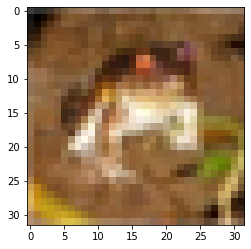

In [6]:
plt.imshow(X_train[0])

In [7]:
y_train[0]

array([6], dtype=uint8)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_cat_train = to_categorical(y_train)
X_train = X_train/256

In [10]:
y_cat_test = to_categorical(y_test)
X_test = X_test/256

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [12]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(MaxPool2D)
model.add(Flatten())
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
early_stopping = EarlyStopping(monitor='val_loss',patience=2)

In [19]:
from gc import callbacks
from traitlets.traitlets import validate
model.fit(X_train,y_cat_train,epochs=15,validation_data=(X_test,y_cat_test),callbacks=[early_stopping])

Epoch 1/15
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4661 - accuracy: 0.4722 - val_loss: 1.2422 - val_accuracy: 0.5567
Epoch 2/15
1563/1563 [==============================] - 57s 36ms/step - loss: 1.1376 - accuracy: 0.6003 - val_loss: 1.1171 - val_accuracy: 0.6038
Epoch 3/15
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9958 - accuracy: 0.6536 - val_loss: 1.0306 - val_accuracy: 0.6420
Epoch 4/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8807 - accuracy: 0.6923 - val_loss: 0.9621 - val_accuracy: 0.6658
Epoch 5/15
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7831 - accuracy: 0.7281 - val_loss: 0.9342 - val_accuracy: 0.6783
Epoch 6/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7007 - accuracy: 0.7533 - val_loss: 0.9434 - val_accuracy: 0.6783
Epoch 7/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6317 - accuracy: 0.7787 - val_loss: 0.9643 -

In [20]:
metrics = pd.DataFrame(model.history.history)

In [21]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.466056,0.47222,1.242222,0.5567
1,1.137552,0.60034,1.117133,0.6038
2,0.995843,0.65364,1.030590,0.6420
3,0.880658,0.69232,0.962146,0.6658
4,0.783061,0.72812,0.934237,0.6783
5,0.700684,0.75330,0.943379,0.6783
6,0.631703,0.77868,0.964346,0.6829


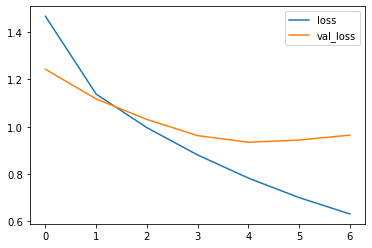

In [22]:
metrics[['loss','val_loss']].plot()

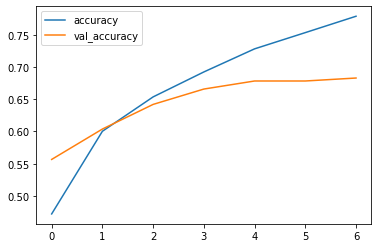

In [23]:
metrics[['accuracy','val_accuracy']].plot()

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
predictions = np.argmax(model.predict(X_test),axis=1)

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1000
           1       0.83      0.81      0.82      1000
           2       0.65      0.50      0.56      1000
           3       0.46      0.49      0.48      1000
           4       0.66      0.57      0.61      1000
           5       0.56      0.63      0.59      1000
           6       0.62      0.87      0.72      1000
           7       0.80      0.68      0.74      1000
           8       0.78      0.79      0.79      1000
           9       0.77      0.79      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



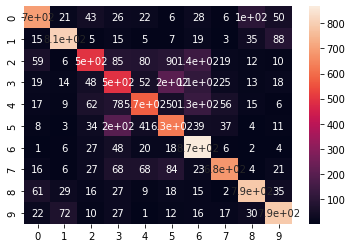

In [28]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)